In [79]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install plotly pandas

In [27]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go              # Plotly graph_objects moduljának importálása. rafikonelemek (pl. vonalas, oszlopdiagramok)
from plotly.subplots import make_subplots      # make_subplots függvény importálása. alábra, vagyis egy grafikonon belül több részdiagram

In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [33]:
tesla=yf.Ticker('TSLA')

In [35]:
tesla_data=tesla.history(period='max')

In [37]:
tesla_data.reset_index(inplace=True)

In [39]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data=requests.get(url).text


In [41]:
soup=BeautifulSoup(html_data, 'html.parser')

In [43]:
read_html_pandas_data = pd.read_html(url)

In [45]:
tesla_revenue = read_html_pandas_data[0]
tesla_revenue.columns=['Date', 'Revenue']
tesla_revenue.head()

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [47]:
# eltávolítja a vesszőket és dollárjeleket a Revenue oszlopból
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', '', regex=True)

In [49]:
# eltávolítja a null és üres értékeket a Revenue oszlopból
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [51]:
# utolsó 5 sor kilistázása
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


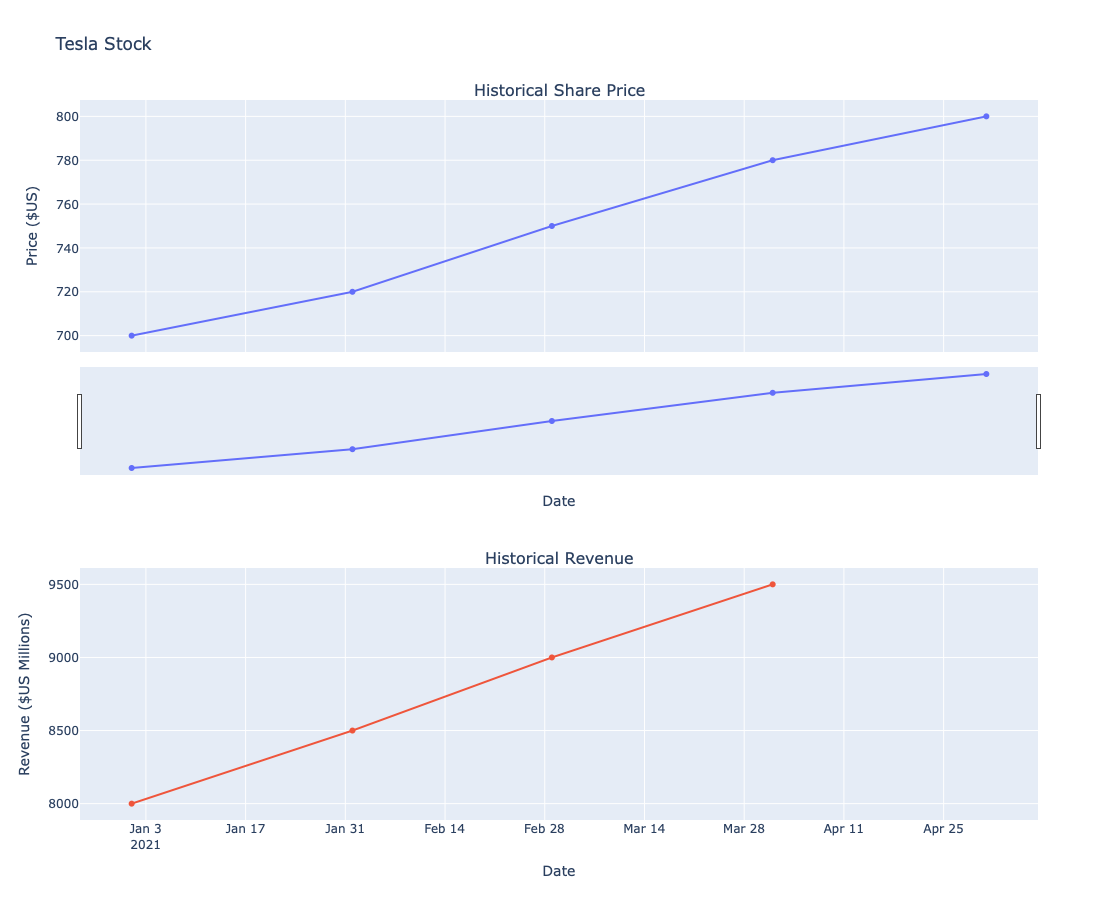

In [53]:
# make_graph nevű függvény létrehozása, 3 paraméterrel
def make_graph(stock_data, revenue_data, stock):
    
    # A dátumok konvertálása datetime típusra, errors='coerce' paraméter segít eltávolítani a hibás dátumokat
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce')
    
    # Szűrés 2021. június 14-ig
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    
    # Szűrés 2021. április 30-ig
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Ha a Revenue oszlopban van nem numerikus karakter (pl. $, ,), azt eltávolítjuk és float típusra konvertáljuk
    revenue_data_specific['Revenue'] = revenue_data_specific['Revenue'].replace({',': '', '$': ''}, regex=True)
    revenue_data_specific['Revenue'] = revenue_data_specific['Revenue'].astype(float)

    # Két alábrából álló ábra létrehozása
    fig = make_subplots(
        rows=2, cols=1, 
        shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing = .3
    )
    
    # Árukészlet ábrázolása
    fig.add_trace(go.Scatter(
        x=stock_data_specific['Date'], 
        y=stock_data_specific['Close'], 
        name="Share Price"), 
        row=1, col=1
    )
    
    # Bevétel ábrázolása
    fig.add_trace(go.Scatter(
        x=revenue_data_specific['Date'], 
        y=revenue_data_specific['Revenue'], 
        name="Revenue"), 
        row=2, col=1
    )
    
    # Tengelyek címkézése
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Ábrázolás beállítása
    fig.update_layout(
        showlegend=False,   # Jelmagyarázat elrejtése
        height=900,         # Grafikon magassága
        title=stock,        # A grafikon címe
        xaxis_rangeslider_visible=True  # Időbeli görgetés lehetősége
    )
    
    # A grafikon megjelenítése
    fig.show()

make_graph(stock_data, revenue_data, stock="Tesla Stock")